In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dataset = "exams.csv"
treinamento = pd.read_csv(dataset)

In [3]:
print(treinamento.head())

***** Conjunto de Treinamento *****
   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68  


In [14]:
print(treinamento.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000


In [15]:
print(treinamento.columns.values)

['gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score']


In [11]:
# Verifica quais valores são nulos (conjunto de treino)
treinamento.isna().head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [12]:
print("***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****")
print(treinamento.isna().sum())

***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [16]:
treinamento['gender'].head()

0      male
1    female
2      male
3      male
4      male
Name: gender, dtype: object

In [18]:
treinamento[['gender', 'math score']].groupby(['gender']).mean().sort_values(by='math score', ascending=False)

,math score
gender,
male,69.384913
female,63.196687


In [19]:
treinamento[["test preparation course", "math score"]].groupby(['test preparation course']).mean().sort_values(by='math score', ascending=False)

,math score
test preparation course,
completed,69.686567
none,64.738346


In [20]:
treinamento[["lunch", "math score"]].groupby(['lunch']).mean().sort_values(by='math score', ascending=False)

,math score
lunch,
standard,70.607362
free/reduced,58.505747


In [22]:
treinamento[["parental level of education", "math score"]].groupby(['parental level of education']).mean().sort_values(by='math score', ascending=False)

,math score
parental level of education,
master's degree,71.585714
bachelor's degree,71.491071
associate's degree,69.536946
some college,65.297297
high school,65.207921
some high school,60.701571


In [30]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
treinamento = treinamento.drop(['reading score','writing score', 'race/ethnicity'], axis=1)
treinamento.head()

,gender,parental level of education,lunch,test preparation course,math score
0,male,high school,standard,completed,67
1,female,some high school,free/reduced,none,40
2,male,some college,free/reduced,none,59
3,male,high school,standard,none,77
4,male,associate's degree,standard,completed,78


In [37]:
labelEncoder = LabelEncoder()
labelEncoder.fit(treinamento['gender'])
treinamento['gender'] = labelEncoder.transform(treinamento['gender'])

labelEncoder = LabelEncoder()
labelEncoder.fit(treinamento['parental level of education'])
treinamento['parental level of education'] = labelEncoder.transform(treinamento['parental level of education'])

labelEncoder = LabelEncoder()
labelEncoder.fit(treinamento['lunch'])
treinamento['lunch'] = labelEncoder.transform(treinamento['lunch'])

labelEncoder = LabelEncoder()
labelEncoder.fit(treinamento['test preparation course'])
treinamento['test preparation course'] = labelEncoder.transform(treinamento['test preparation course'])

In [38]:
treinamento.head()

,gender,parental level of education,lunch,test preparation course,math score
0,1,2,1,0,67
1,0,5,0,1,40
2,1,4,0,1,59
3,1,2,1,1,77
4,1,0,1,0,78


In [39]:
# Verificando se os valores são numéricos ou não
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int32
 3   test preparation course      1000 non-null   int32
 4   math score                   1000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 31.4 KB


In [41]:
X = np.array(treinamento.drop(['math score'], 1).astype(float))

C:\Users\luiza\AppData\Local\Temp\ipykernel_69236\2690853522.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(treinamento.drop(['math score'], 1).astype(float))


In [42]:
y = np.array(treinamento['math score'])

In [43]:
kmeans = KMeans(n_clusters=3) # agrupar o conjunto em 3 clusters, baseados na nota de matematica
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[0.49636804 4.46246973 0.62469734 0.64891041]
 [0.55873016 0.35555556 0.67301587 0.63809524]
 [0.5        2.25735294 0.66911765 0.72058824]]


In [44]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


In [46]:
kmeans = kmeans = KMeans(n_clusters=3, max_iter=2000)
kmeans.fit(X)

KMeans(max_iter=2000, n_clusters=3)

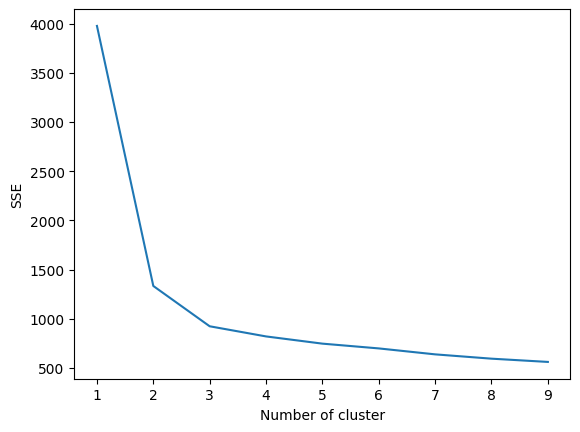

In [52]:
#Elbow Criterion Method:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()